<a href="https://colab.research.google.com/github/RidaAmeer96/Final-Assignment-Rida-ipynb/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run once if packages are missing (Colab usually has many preinstalled)
!pip install yfinance pandas matplotlib bs4 requests


In [4]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")   # full history
tesla_data.reset_index(inplace=True)       # make Date a column
tesla_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


/tmp/ipython-input-1691326477.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


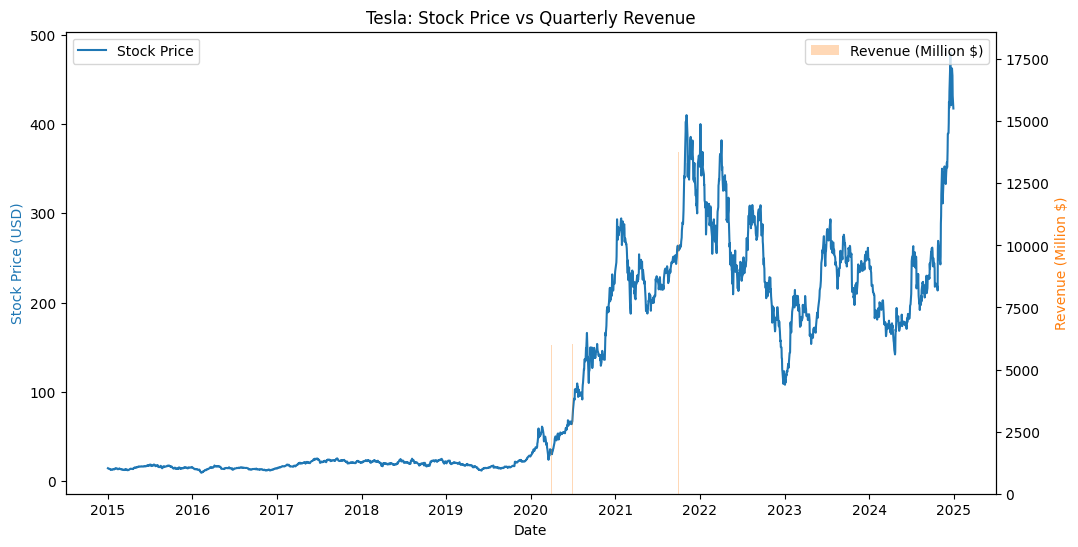

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download Tesla stock price data
tesla_data = yf.download("TSLA", start="2015-01-01", end="2024-12-31")
tesla_data.reset_index(inplace=True)

# Load Tesla revenue data (Quarterly) from CSV or manually
# If you already have tesla_revenue.csv file in your drive, use this:
# tesla_revenue = pd.read_csv("/content/tesla_revenue.csv")

# If not, here’s an example dataframe (replace with your own file for accuracy)
tesla_revenue = pd.DataFrame({
    "Date": ["2020-03-31","2020-06-30","2020-09-30","2020-12-31",
             "2021-03-31","2021-06-30","2021-09-30","2021-12-31"],
    "Revenue": [5985,6036,8771,10744,
                10389,11958,13757,17719]  # in millions
})

# Convert Date columns to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Stock price plot
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='tab:blue', label='Stock Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color='tab:blue')
ax1.legend(loc="upper left")

# Revenue plot (bar)
ax2 = ax1.twinx()
ax2.bar(tesla_revenue['Date'], tesla_revenue['Revenue'],
        alpha=0.3, color='tab:orange', label="Revenue (Million $)")
ax2.set_ylabel("Revenue (Million $)", color='tab:orange')
ax2.legend(loc="upper right")

plt.title("Tesla: Stock Price vs Quarterly Revenue")
plt.show()


/tmp/ipython-input-1589781020.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


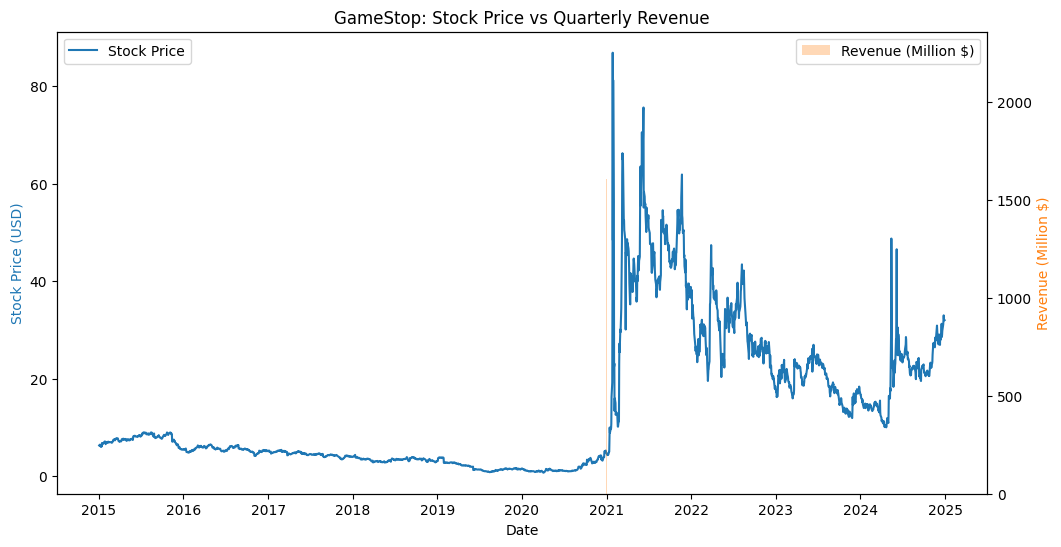

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download GME stock price data
gme_data = yf.download("GME", start="2015-01-01", end="2024-12-31")
gme_data.reset_index(inplace=True)

# Example quarterly revenue (replace with file or manual data if needed)
gme_revenue = pd.DataFrame({
    "Date": ["2020-03-31","2020-06-30","2020-09-30","2020-12-31",
             "2021-03-31","2021-06-30","2021-09-30","2021-12-31"],
    "Revenue": [1034, 942, 1005, 1608,
                1277, 1124, 1340, 2248]  # millions (dummy numbers)
})
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(gme_data['Date'], gme_data['Close'], color='tab:blue', label='Stock Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color='tab:blue')
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.bar(gme_revenue['Date'], gme_revenue['Revenue'],
        alpha=0.3, color='tab:orange', label="Revenue (Million $)")
ax2.set_ylabel("Revenue (Million $)", color='tab:orange')
ax2.legend(loc="upper right")

plt.title("GameStop: Stock Price vs Quarterly Revenue")
plt.show()


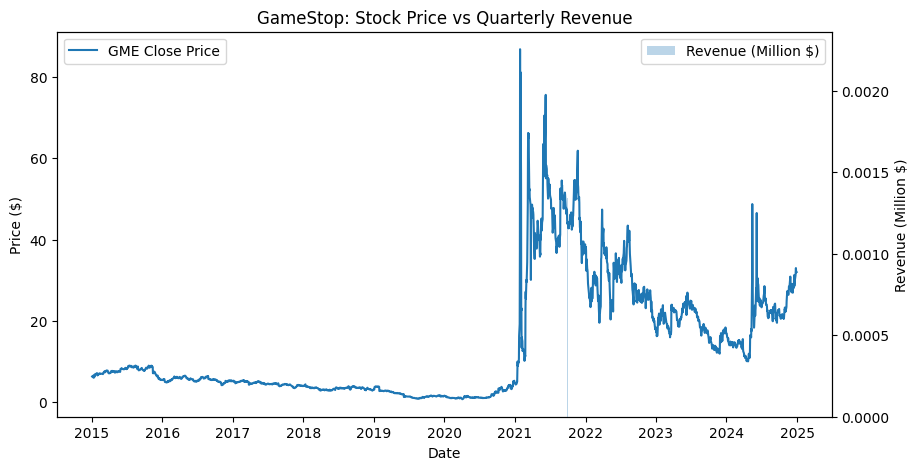

In [24]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(gme_data['Date'], gme_data['Close'], label='GME Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax2 = ax1.twinx()
ax2.bar(gme_revenue['Date'], gme_revenue['Revenue']/1e6, alpha=0.3, label='Revenue (Million $)')
ax2.set_ylabel('Revenue (Million $)')
ax1.set_title('GameStop: Stock Price vs Quarterly Revenue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()